<a href="https://colab.research.google.com/github/leejeongeun97/dataAnalysis/blob/main/3_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98_3_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우를 이용한 붓꽃 이미지 분류

### [주의!] 런타임 유형 변경 --> T4 GPU 선택


### 코랩 하드웨어(Processor) 사양 확인

In [1]:
# CPU 정보
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [2]:
# GPU 정보
!nvidia-smi

Thu May  9 02:55:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 1.데이터 준비하기
- 사전에 구글 드라이브에 "0_datasets/iris" 폴더를 만들고
- 붓꽃 이미지 데이터 폴더(3개의 폴더에 담긴 이미지들)를 업로드한 상태에서 코드를 실행한다.
- 붓꽃 이미지 데이터 폴더 위치 /content/drive/My Drive/0_datasets/iris

### 라이브러리 가져오기

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 붓꽃 이미지 파일 읽어오기
- 구글 드라이브를 마운트 하기

In [4]:
#구글드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 붓꽃 이미지 위치 폴더로 이동하기

In [5]:
print(f'현재 디렉토리: {os.getcwd()}')
# listdir = os.listdir()
# listdir.sort()
# listdir
target_dir = '/content/drive/My Drive/0_datasets/iris'
if os.getcwd() == target_dir:
    pass
else:
    os.chdir(target_dir)
    os.listdir()
print(f'현재 디렉토리: {os.getcwd()}')

현재 디렉토리: /content
현재 디렉토리: /content/drive/MyDrive/0_datasets/iris


- 붓꽃 이미지 파일 읽어오기

In [6]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk(target_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-1804702f49c2c385f8b30913569aebc6dce3da52ec02c2c638a2b0806f16014e.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-24cb956e50b7ea4ab5e25eb5450298d37b7b0c49d204279dfdbf9c90c376ddf4.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-0b486eebacd93e114a6ec24264e035684cebe7d2074eb71eb1a71dd70bf61e8f.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-249370d38cc29bc2a4038e528f9c484c186fe46a126e4b6c76607860679c0453.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-08c7a0e53ee1de193062d7bf86a21adec67b9115fd6099f1b2d2ee728a936002.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-240cff8aa17cb406f5c0b1be7420b2ac850e3c75ce0148d76abe3328c145367e.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-0f612632106cde3e540e50d8e798ab31a1f88e61d9d82c6033caf97141d95db8.jpg
/content/drive/My Drive/0_datasets/iris/iris-virginica/iris-11fec7884160b8ce5c24faea946e137f8f38e

### 분류(classes) 지정하기

In [7]:
# 이미지 파일 위치(path) 지정하기
import pathlib

data_dir = target_dir # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

# 붓꽃 분류(classes) 지정하기
setosa = list(data_dir.glob('iris-setosa/*'))
versicolour = list(data_dir.glob('iris-versicolour/*'))
virginica = list(data_dir.glob('iris-virginica/*'))

print("Length of setosa: ", len(setosa))
print("Length of versicolour: ", len(versicolour))
print("Length of virginica: ", len(virginica))

Length of setosa:  67
Length of versicolour:  269
Length of virginica:  85


### 임의의 붓꽃 이미지 출력해보기(matplotlib 그래프 이용)

53
180
62


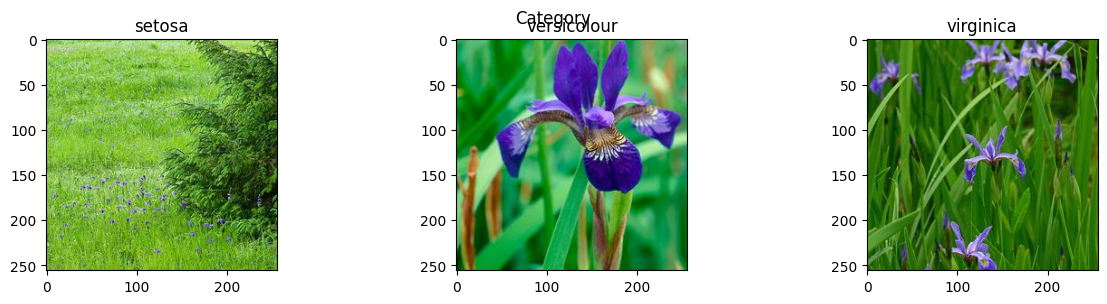

In [8]:
import matplotlib.image as img
import PIL.Image as Image

fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(15,3))
fig.suptitle('Category')

rand_setosa = np.random.randint(-1,len(setosa))
print(rand_setosa)

rand_versicolour = np.random.randint(-1, len(versicolour))
print(rand_versicolour)

rand_virginica = np.random.randint(-1, len(virginica))
print(rand_virginica)


setosa_image = img.imread(setosa[rand_setosa])
versicolour_image = img.imread(versicolour[rand_versicolour])
virginica_image = img.imread(virginica[rand_virginica])

ax[0].set_title('setosa')
ax[1].set_title('versicolour')
ax[2].set_title('virginica')

ax[0].imshow(setosa_image)
ax[1].imshow(versicolour_image)
ax[2].imshow(virginica_image)



---



## 2.데이터 전처리

### 데이터 분류값 지정하기

In [9]:
# contains the images path

df_images = {
    'setosa' : setosa,
    'versicolour' : versicolour,
    'virginica': virginica
}

# contains numerical labels for the categories
df_labels = {
    'setosa' : 0,
    'versicolour' : 1,
    'virginica': 2
}

### 이미지 모양(shape) 확인

In [10]:
import cv2

img = cv2.imread(str(df_images['virginica'][rand_virginica])) # Converting it into numerical arrays
img.shape


(256, 256, 3)

### 학습 데이터 지정하기(X and y)
- MobileNetv2 model에서 사용(학습)할 수 있도록 (224, 224) 사이즈로 변경한다.

In [11]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():  # df_images 딕셔너리 정보를 (레이블,값)으로 분리
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img)
        y.append(df_labels[label])
print(len(X), len(y))


421 421


### 넘파이 array로 변환(X and y to numpy arrays)

In [12]:
X = np.array(X)
y = np.array(y)

### 학습 데이터 분리하기(Split into training, validation, and test sets)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size = 0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((336, 224, 224, 3),
 (22, 224, 224, 3),
 (63, 224, 224, 3),
 (336,),
 (22,),
 (63,))



---



## 3.모델 학습하기

### (딥러닝)라이브러리 가져오기

In [14]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
# from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)

2.15.0


- 원핫인코딩(One-Hot Encodig) 형태로 변환하기
 * 해당 값은 1, 그 외는 모두 0

In [15]:
num_label = len(np.unique(y)) # number of labels

y_train_cat = keras.utils.to_categorical(y_train, num_label)
y_val_cat = keras.utils.to_categorical(y_val, num_label)
y_test_cat = keras.utils.to_categorical(y_test, num_label)

### 모델 정의하기(신경망 구성하기)
- 전이학습모델 사용(mobilenet_v2)

In [16]:
normalizer = tf.keras.layers.Rescaling(scale=1/255)

In [17]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer


In [19]:
model = keras.Sequential([
    keras.Input(shape=(224,224,3)),
    normalizer,
    mobile_net,
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_label, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- 학습하기
 * epochs=100

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history = model.fit(X_train, y_train_cat,
                    epochs=100, validation_data=(X_val, y_val_cat),
                    callbacks=[early_stopping, mc])

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 1.0535 - accuracy: 0.6012

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 11s 319ms/step - loss: 1.0535 - accuracy: 0.6012 - val_loss: 0.8978 - val_accuracy: 0.5909
Epoch 2/100
11/11 [==============================] - 0s 40ms/step - loss: 0.9040 - accuracy: 0.5833 - val_loss: 0.9699 - val_accuracy: 0.6364
Epoch 3/100
11/11 [==============================] - 1s 68ms/step - loss: 0.8554 - accuracy: 0.6458 - val_loss: 0.8323 - val_accuracy: 0.6364
Epoch 4/100
11/11 [==============================] - 0s 38ms/step - loss: 0.8328 - accuracy: 0.6339 - val_loss: 0.9083 - val_accuracy: 0.5909
Epoch 5/100
11/11 [==============================] - 0s 37ms/step - loss: 0.7413 - accuracy: 0.6964 - val_loss: 0.8658 - val_accuracy: 0.6364
Epoch 6/100
11/11 [==============================] - 1s 74ms/step - loss: 0.6568 - accuracy: 0.7113 - val_loss: 0.8172 - val_accuracy: 0.6818
Epoch 7/100
11/11 [==============================] - 1s 71ms/step - loss: 0.6366 - accuracy: 0.7083 - val_loss: 0.8076 - val_accuracy: 0.6818
Epoch 8/100
11/1



---



## 4.평가 및 예측

### 테스트 데이터로 예측해보기(Predict on test set)

In [22]:
prediction = model.predict(X_test, batch_size=64, verbose=1)
prediction = np.argmax(model.predict(X_test), axis=-1) #for multiclass
prediction = prediction.flatten()
prediction

2/2 [==============================] - 1s 962ms/step


array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 모델 정확도 확인

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.5714285714285714


In [24]:
model.evaluate(X_test,y_test_cat)

2/2 [==============================] - 0s 45ms/step - loss: 1.1027 - accuracy: 0.5714


[1.102735161781311, 0.5714285969734192]

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.58      0.86      0.69        35
           2       0.43      0.23      0.30        13

    accuracy                           0.57        63
   macro avg       0.59      0.43      0.44        63
weighted avg       0.59      0.57      0.52        63



In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

array([[ 3, 12,  0],
       [ 1, 30,  4],
       [ 0, 10,  3]])

### 실제 / 예측 비교

In [27]:
df = pd.DataFrame({'actual': y_test, 'predicted': prediction})
df

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
58,1,1
59,2,1
60,2,1
61,1,1


In [28]:
import plotly
plotly.__version__

'5.15.0'

In [29]:
import plotly.io as pio
pio.renderers.default = "colab"

In [30]:
import plotly.express as px

acc = pd.DataFrame({'train': history.history['accuracy'],
                    'val': history.history['val_accuracy']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::],
              title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [31]:
loss = pd.DataFrame({'train': history.history['loss'],
                     'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::],
              title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()